# Networks Analysis with Python
#### A series of notebook of models and metrics for analysing large datasets of networks
Based on slides from Cecilia Mascolo's lectures for the Cambridge University Computer Lab course <a href=https://www.cl.cam.ac.uk/teaching/1415/L109/>Social and Technological Network Analysis</a>

In [119]:
import matplotlib.pyplot as plt # required for plotting graphs
import networkx as nx # main graph library
import numpy as np 
import pandas as pd
# show graphs in the notebook
%matplotlib inline 

## Graphs are useful
- A _graph_ $G$ is a tuple $(V, E)$ of a set of nodes (also called vertices) and edges. An edge in $E$ connects two nodes in $V$
- The _neighbour set_ $N(v)$ of a node v is the set of nodes which are connected to $v$ by an edge. We can write this as $$ N(v) = \{ u \in V \mid (v, u) \in E, u \neq v \} $$


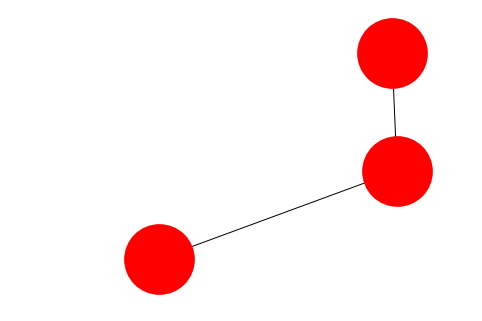

In [162]:
V = [1, 2, 3]
E = [(1, 2), (1,3)]
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)
nx.draw(G, node_size=5000, linewidths=0)

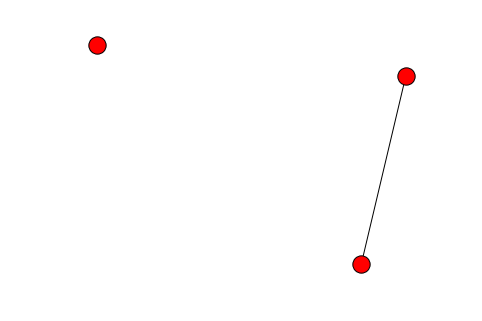

In [139]:
G = nx.erdos_renyi_graph(3, 0.5)
nx.draw(G)

In [70]:
# also called a binomial graph or G(n,p).
# n nodes, an edge e=(n1, n2) exists with probablity p
G = nx.erdos_renyi_graph(n=100, p=0.2, directed=False)

## Probability of a node having degree $k$
The expected degree of a node equals $$ P(k_i=k) = {N \choose k} p^k (1− p)^{N−1−k}$$

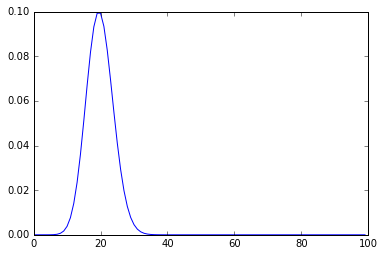

In [111]:
def choose(n, k):
    from math import factorial
    return (factorial(n) / 
            (factorial(n-k) * factorial(k)))

def p_of_degree(k, n, p):
    '''Returns the probability of a node
    in a random n, p binomial graph having k degrees'''
    return choose(n-1, k) * p**k * (1-p)**(n-1-k)

# G.number_of_nodes() == G.order()
plt.plot([p_of_degree(k, G.number_of_nodes(), 0.2) for k in xrange(G.number_of_nodes())]); 

## Average degrees $\langle k \rangle$ of a node 

- Equal to the number of possible successor nodes $N - 1$ times the probability $p$ of an edge connecting them.
- So, for large $N$, roughly $Np$

In [112]:
def expected_degree_of_Gnp(n, p):
    return (n-1) * p

expected_degree_of_Gnp(100, 0.2)

19.8

In [114]:
def average_path_of_Gnp(n, p):
    # node at distance L
    # n = k**L
    # log n = L log k
    # L = log n / log k
    return np.log(n) / np.log(expected_degree_of_Gnp(n, p))

average_path_of_Gnp(100, 0.2)

1.54241820866388

## Relationship	of	$\langle k \rangle$	and	graph connectedness	
- $\langle k \rangle =$ average degree(np) 
- If $\langle k \rangle < 1$ graph is disconnected
- If $\langle k \rangle > 1$ graph has a giant component
- If $\langle k \rangle \geqslant ln(N)$ graph	is	totally	connected	